- The line from keras.datasets import cifar10 is an import statement in Python that imports the CIFAR-10 dataset from the   Keras library. 

- Keras is a high-level deep learning framework that provides a user-friendly interface to build, train, and evaluate         neural networks. It allows you to easily work with various datasets, including CIFAR-10.

- CIFAR-10 is a popular benchmark dataset in computer vision. It consists of 60,000 32x32 color images in 10 different       classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 testing images.

- By importing the CIFAR-10 dataset from Keras, you gain access to the preloaded data, which you can then use for tasks       such as training and evaluating deep learning models. This dataset is commonly used for image classification tasks and     serves as a good starting point for learning and experimenting with deep learning algorithms.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns

### Import the cifar10 dataset from keras.datasets Perform all the data preprocessing required load the Dataset and Prepare testing and training data

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 70s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Change the Datatype to Float and Normalize it

In [5]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [6]:
x_train.dtype

dtype('float64')

In [7]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


### Do the one hot Encoding of the Dependent Variable using Keras.utils

In [8]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [9]:
num_classes= len(np.unique(y_train))

In [10]:
num_classes

10

In [11]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [12]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

### Divide the Training Dataset into validation and Training

In [13]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [14]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [15]:
print(y_valid.shape)
print(x_valid.shape)

(5000, 10)
(5000, 32, 32, 3)


## Build a CNN architecture with Keras and stack an ANN on top of CNN

In [16]:
#Import the Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

### Build a CNN Architecture with Keras

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [19]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [20]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [22]:
model.add(Flatten())

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

## Stack an ANN on top of CNN

In [24]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [25]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [26]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [27]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

## Fit the model

In [29]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 31s - loss: 2.0850 - accuracy: 0.1749 - val_loss: 1.9455 - val_accuracy: 0.1878 - 31s/epoch - 339ms/step
Epoch 2/10
90/90 - 26s - loss: 1.8710 - accuracy: 0.2480 - val_loss: 1.7453 - val_accuracy: 0.3098 - 26s/epoch - 293ms/step
Epoch 3/10
90/90 - 26s - loss: 1.7003 - accuracy: 0.3354 - val_loss: 1.6463 - val_accuracy: 0.3686 - 26s/epoch - 286ms/step
Epoch 4/10
90/90 - 25s - loss: 1.6118 - accuracy: 0.3817 - val_loss: 1.6028 - val_accuracy: 0.3926 - 25s/epoch - 275ms/step
Epoch 5/10
90/90 - 25s - loss: 1.5286 - accuracy: 0.4188 - val_loss: 1.5335 - val_accuracy: 0.4230 - 25s/epoch - 275ms/step
Epoch 6/10
90/90 - 25s - loss: 1.4646 - accuracy: 0.4525 - val_loss: 1.4372 - val_accuracy: 0.4746 - 25s/epoch - 281ms/step
Epoch 7/10
90/90 - 25s - loss: 1.4194 - accuracy: 0.4781 - val_loss: 1.4047 - val_accuracy: 0.4868 - 25s/epoch - 278ms/step
Epoch 8/10
90/90 - 25s - loss: 1.3595 - accuracy: 0.5020 - val_loss: 1.3351 - val_accuracy: 0.5186 - 25s/epoch - 274ms/step
Epoch 9/

### Fit and evaluate the model. Plot the training and validation curves and Evaluate the Results.

In [30]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.3059 - accuracy: 0.5360


In [31]:
results

[1.3059428930282593, 0.5360000133514404]

In [32]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

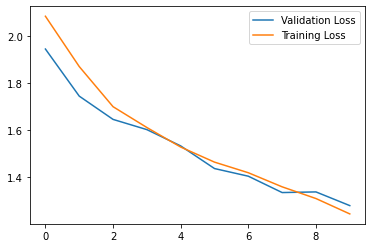

In [33]:
plt.plot(answers.history['val_loss'],label='Validation Loss')
plt.plot(answers.history['loss'],label='Training Loss')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

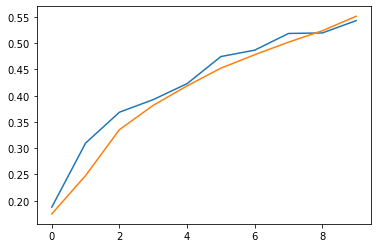

In [34]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy')
plt.plot(answers.history['accuracy'],label='Training Accuracy')
plt.legend